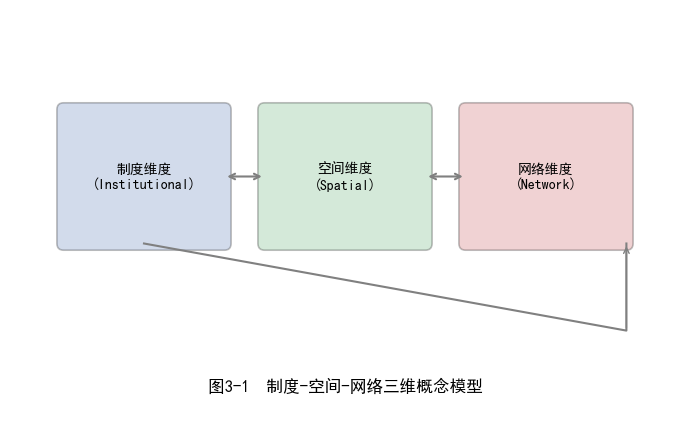

In [1]:
# fig3_1_model.py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch, Circle
from matplotlib.lines import Line2D

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(0,10); ax.set_ylim(0,6)
ax.axis('off')

# 三个维度方块
colors = ['#4C72B0','#55A868','#C44E52']
labels = ['制度维度\n(Institutional)','空间维度\n(Spatial)','网络维度\n(Network)']
coords  = [(2,3.5),(5,3.5),(8,3.5)]
for (x,y),lab,c in zip(coords,labels,colors):
    box = FancyBboxPatch((x-1.2,y-1),2.4,2,boxstyle='round,pad=0.1',
                         fc=c,ec='k',lw=1.2,alpha=0.25)
    ax.add_patch(box)
    ax.text(x,y,lab,color='k',ha='center',va='center',fontsize=10,weight='bold')

# 双向箭头
for i in range(2):
    ax.annotate('',xy=(coords[i+1][0]-1.2,coords[i+1][1]),
                xytext=(coords[i][0]+1.2,coords[i][1]),
                arrowprops=dict(arrowstyle='<->',lw=1.5,color='gray'))
# 反馈弧
arc = Line2D([coords[0][0],9.2,coords[2][0]+1.2],
             [coords[0][1]-1,1.2,coords[2][1]-1],
             color='gray',lw=1.5)
ax.add_line(arc)
ax.annotate('',xy=(coords[2][0]+1.2,coords[2][1]-1),
            xytext=(9.2,1.2),arrowprops=dict(arrowstyle='->',color='gray'))

ax.text(5,0.3,'图3-1  制度-空间-网络三维概念模型',ha='center',fontsize=12,weight='bold')
plt.tight_layout()
plt.savefig('图3-1.pdf', dpi=600); plt.savefig('图3-1.png', dpi=600)
plt.show()

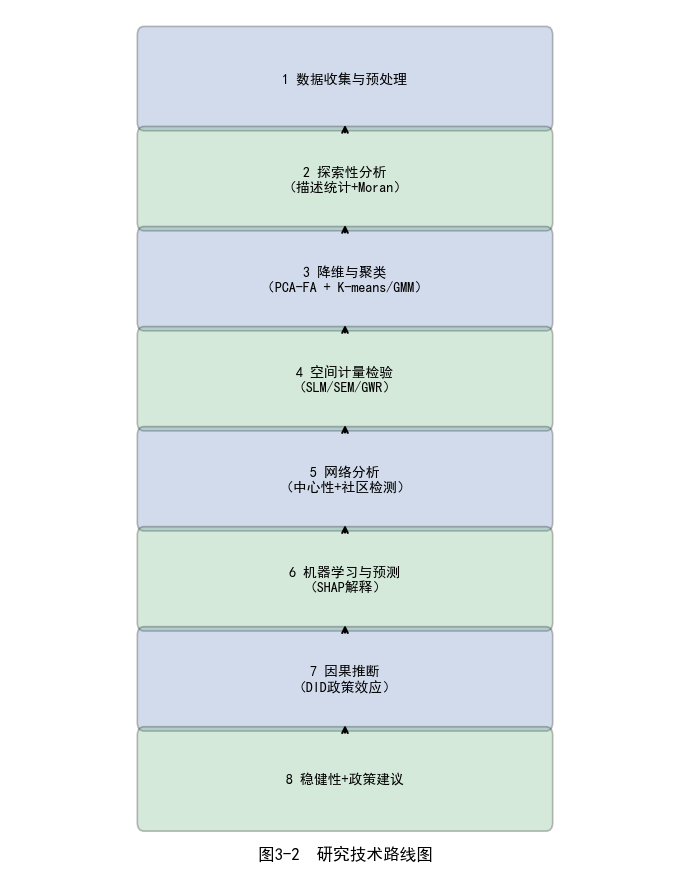

In [3]:
# fig3_2_fixed.py
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(7, 9))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

steps = [
    '1 数据收集与预处理',
    '2 探索性分析\n（描述统计+Moran）',
    '3 降维与聚类\n（PCA-FA + K-means/GMM）',
    '4 空间计量检验\n（SLM/SEM/GWR）',
    '5 网络分析\n（中心性+社区检测）',
    '6 机器学习与预测\n（SHAP解释）',
    '7 因果推断\n（DID政策效应）',
    '8 稳健性+政策建议'
]

# 统一参数
box_w, box_h = 6, 1.0
dx = 5          # 中心 x 坐标
dy = 1.15       # 步长
top_y = 9.2     # 第一个框中心 y

# 画框+文字
for i, txt in enumerate(steps):
    cx, cy = dx, top_y - i * dy
    box = FancyBboxPatch((cx - box_w/2, cy - box_h/2), box_w, box_h,
                         boxstyle='round,pad=0.1',
                         fc='#4C72B0' if i % 2 == 0 else '#55A868',
                         ec='k', lw=1.2, alpha=0.25)
    ax.add_patch(box)
    ax.text(cx, cy, txt, va='center', ha='center', fontsize=10, weight='bold')
    # 箭头（除最后一个）
    if i < len(steps) - 1:
        ax.annotate('', xy=(cx, cy - box_h/2),
                    xytext=(cx, cy + box_h/2 - dy),
                    arrowprops=dict(arrowstyle='->', lw=1.5, color='k'))

ax.text(dx, 0.3, '图3-2  研究技术路线图', va='center', ha='center', fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig('图3-2.pdf', dpi=600)
plt.savefig('图3-2.png', dpi=600)
plt.show()